In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Dropping the target column
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


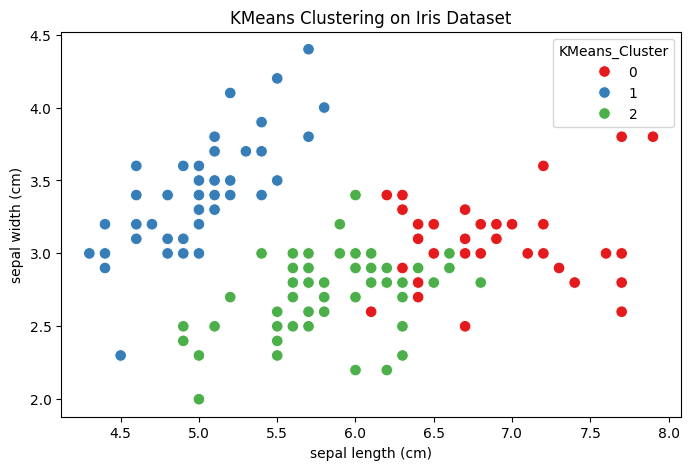

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

# Visualize using first two features
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=iris.feature_names[0], y=iris.feature_names[1],
                hue='KMeans_Cluster', palette='Set1', s=70)
plt.title('KMeans Clustering on Iris Dataset')
plt.show()


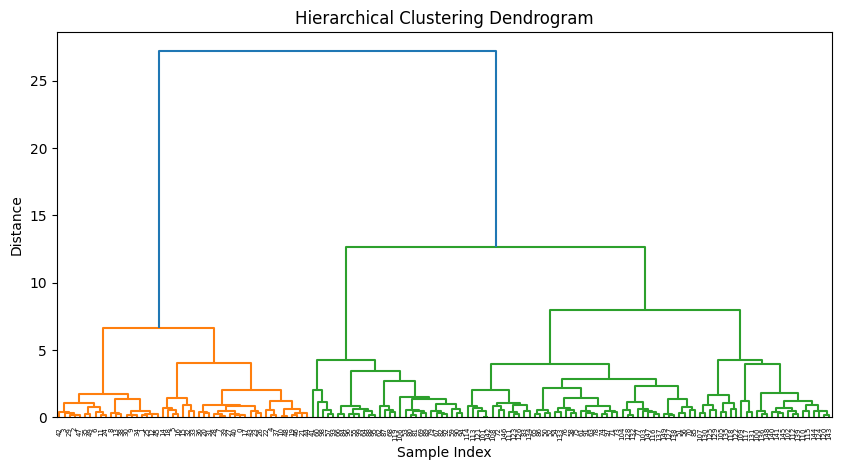

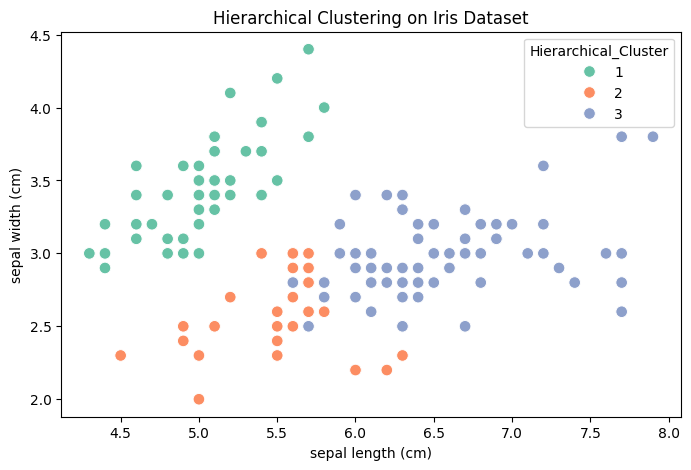

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# Standardize the data (recommended for hierarchical clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[iris.feature_names])

# Perform hierarchical clustering
linkage_matrix = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels (let’s cut the dendrogram at 3 clusters)
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, 3, criterion='maxclust')

# Visualize clusters using first two features
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=iris.feature_names[0], y=iris.feature_names[1],
                hue='Hierarchical_Cluster', palette='Set2', s=70)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.show()
